In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/Exam papers/Exam papers/SLC/OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [6]:
df.columns=df.columns.str.replace(' ','')

In [7]:
df['timedelta'].value_counts()

91.0     104
72.0     102
84.0     101
59.0      99
29.0      99
        ... 
375.0     15
656.0     15
376.0     15
730.0     12
8.0        8
Name: timedelta, Length: 724, dtype: int64

In [8]:
df.drop(['url','timedelta'],axis=1,inplace=True)

In [9]:
df.shape

(39644, 59)

In [10]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [11]:
#Preparing the target variable
df.loc[df['shares']<1400,'shares']=0 #Unpopular
df.loc[df['shares']>=1400,'shares']=1

In [12]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


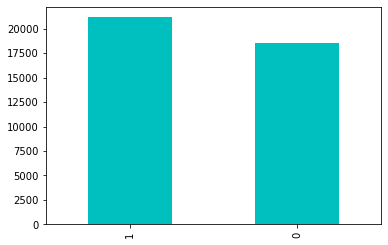

In [13]:
df['shares'].value_counts().plot(kind='bar',color='c')
plt.show()

In [14]:
df['shares'].value_counts(1)

1    0.533599
0    0.466401
Name: shares, dtype: float64

In [15]:
num=[]
cat=[]
for col in df.columns:
    if col!='shares':
        if df[col].nunique()>2:
            num.append(col)
        else:
            cat.append(col)

In [16]:
cat

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend']

In [17]:
for i in cat:
    print(i)
    print(df[i].value_counts())

data_channel_is_lifestyle
0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64
data_channel_is_entertainment
0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64
data_channel_is_bus
0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64
data_channel_is_socmed
0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64
data_channel_is_tech
0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64
data_channel_is_world
0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64
weekday_is_monday
0.0    32983
1.0     6661
Name: weekday_is_monday, dtype: int64
weekday_is_tuesday
0.0    32254
1.0     7390
Name: weekday_is_tuesday, dtype: int64
weekday_is_wednesday
0.0    32209
1.0     7435
Name: weekday_is_wednesday, dtype: int64
weekday_is_thursday
0.0    32377
1.0     7267
Name: weekday_is_thursday, dtype: int64
weekday_is_friday
0.0    33943
1.0     5701
Name: weekday_is_friday, dtype: int64
weekday_is_saturda

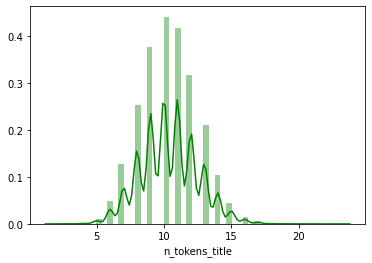

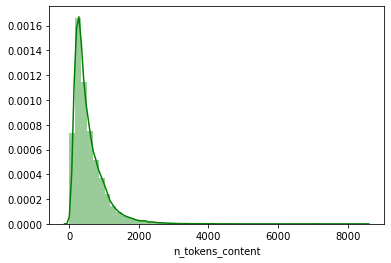

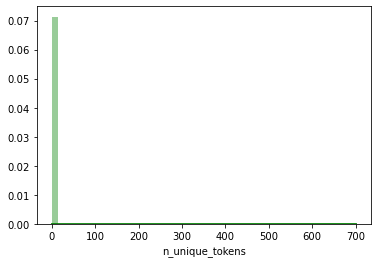

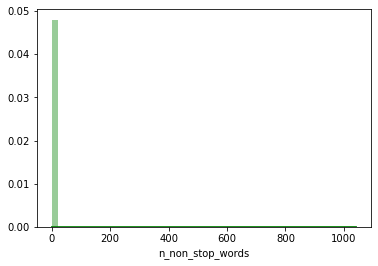

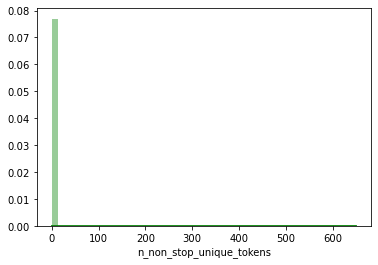

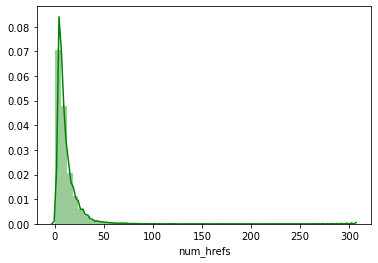

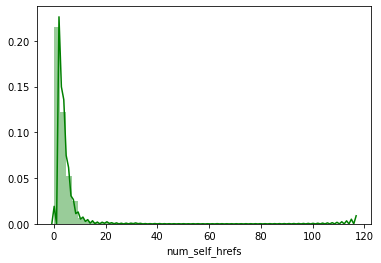

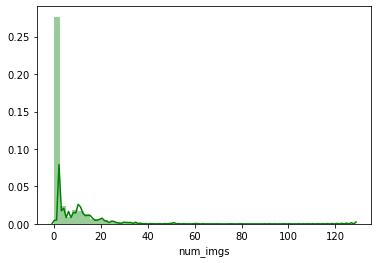

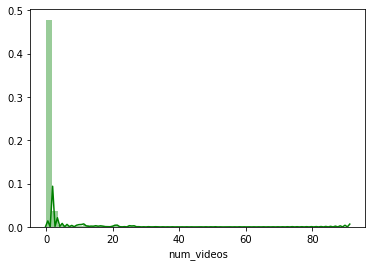

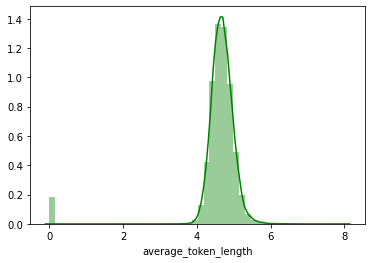

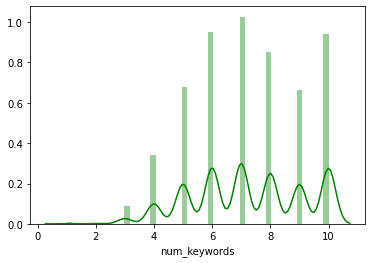

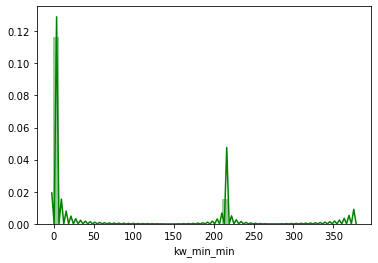

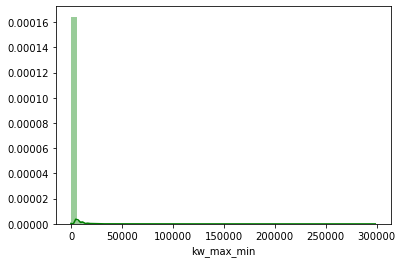

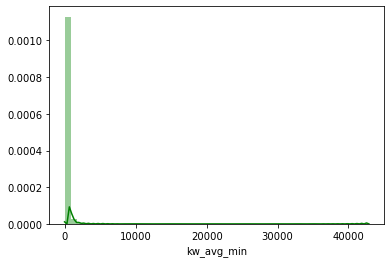

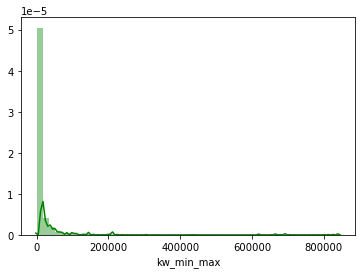

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


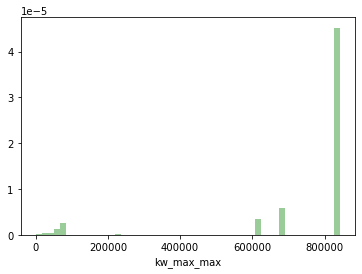

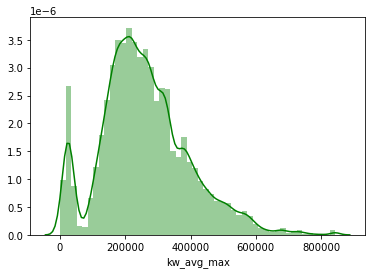

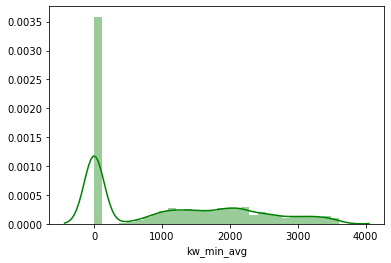

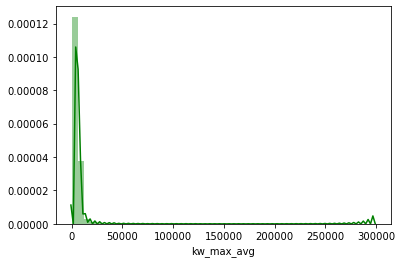

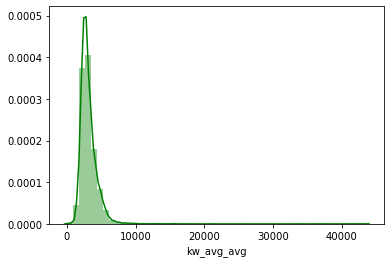

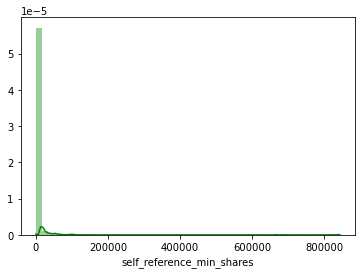

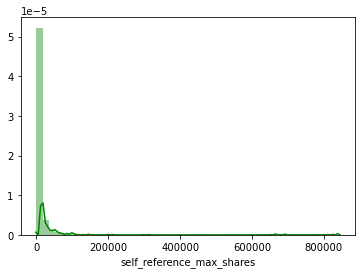

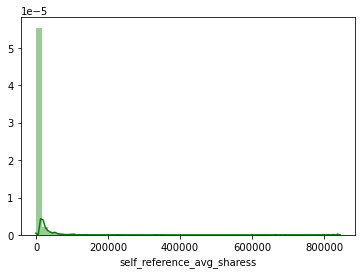

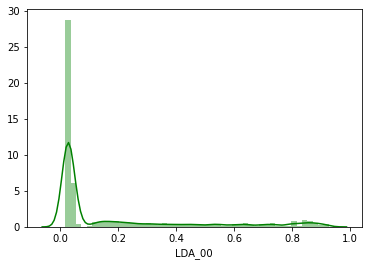

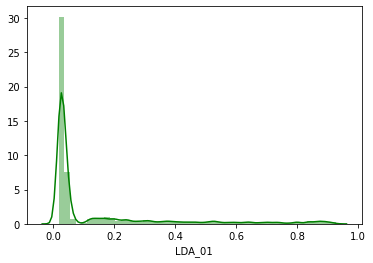

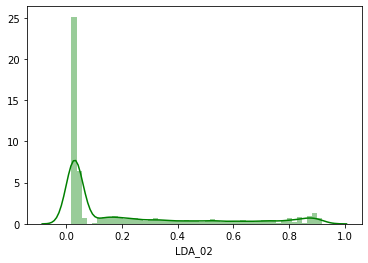

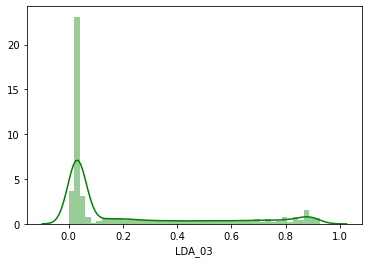

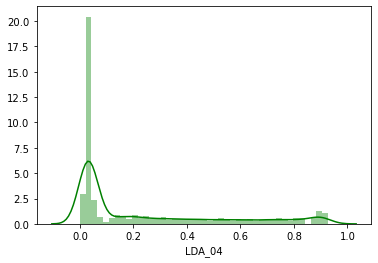

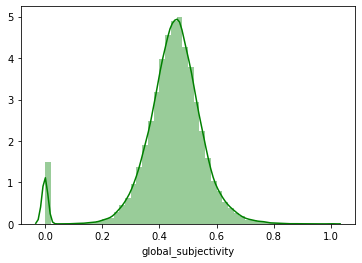

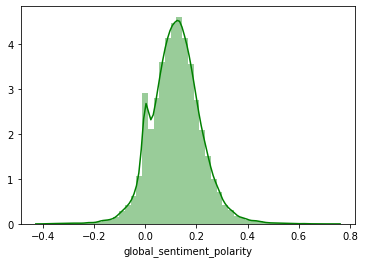

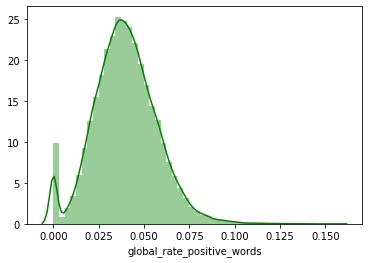

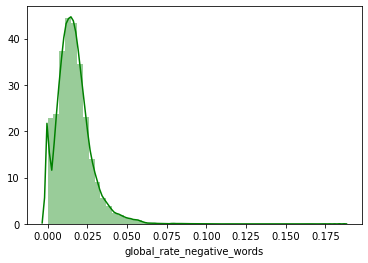

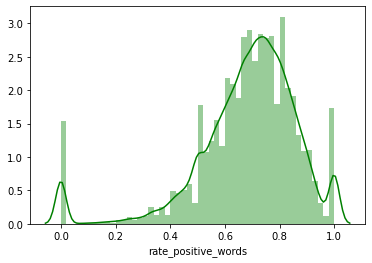

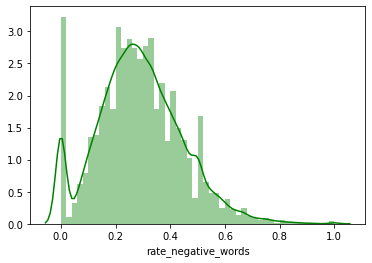

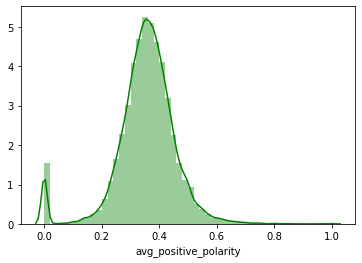

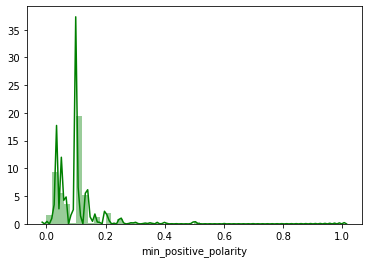

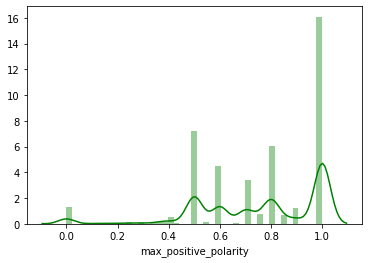

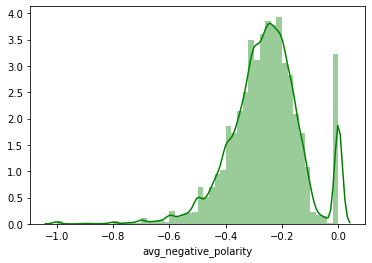

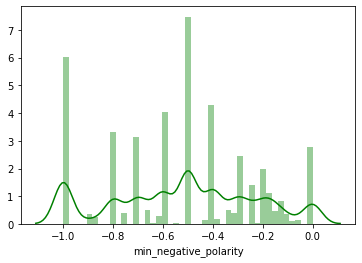

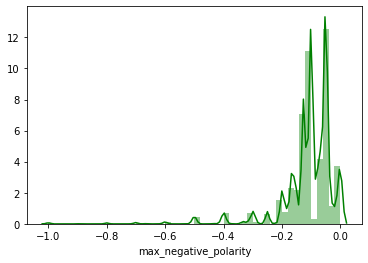

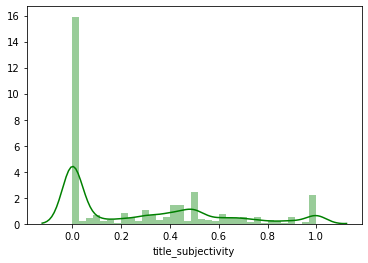

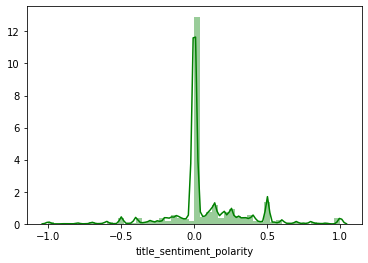

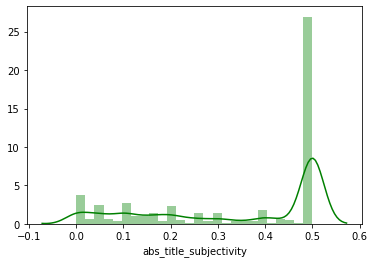

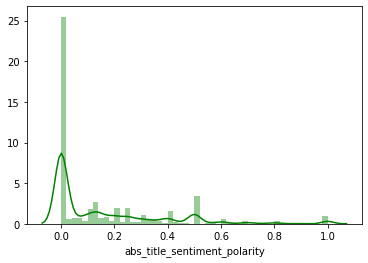

In [18]:
for col in num:
    sns.distplot(df[col],color='g')
    plt.show()

n_tokens_title


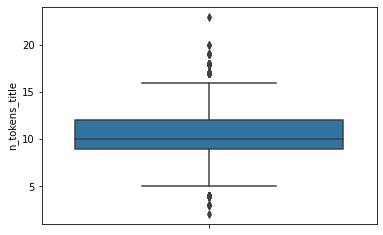

n_tokens_content


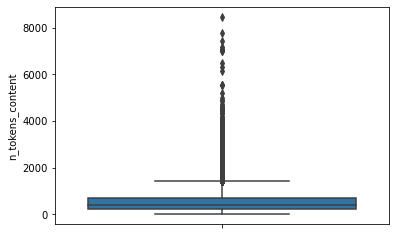

n_unique_tokens


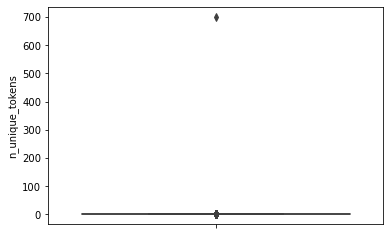

n_non_stop_words


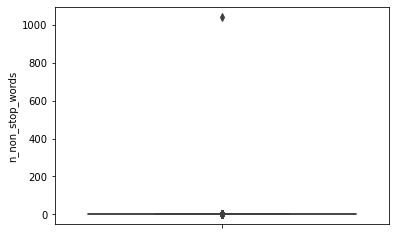

n_non_stop_unique_tokens


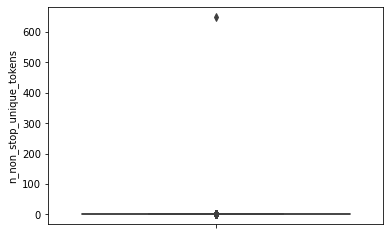

num_hrefs


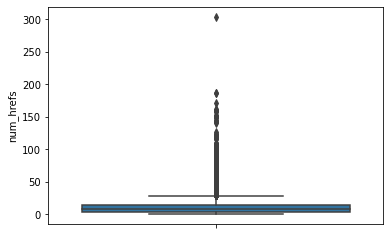

num_self_hrefs


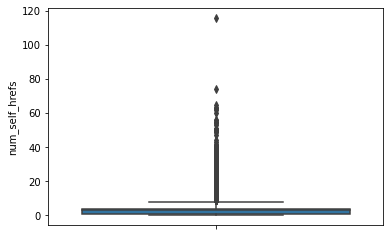

num_imgs


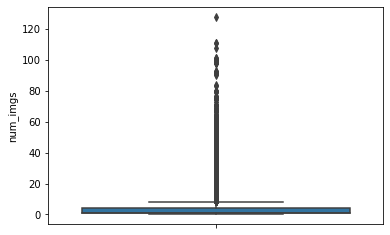

num_videos


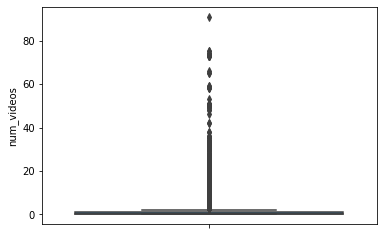

average_token_length


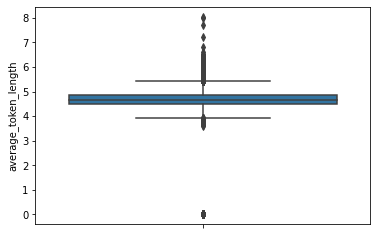

num_keywords


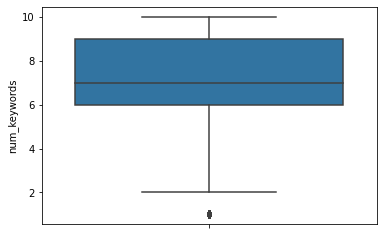

kw_min_min


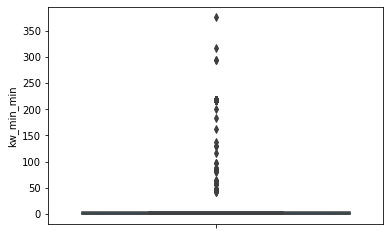

kw_max_min


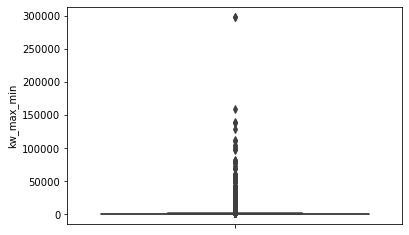

kw_avg_min


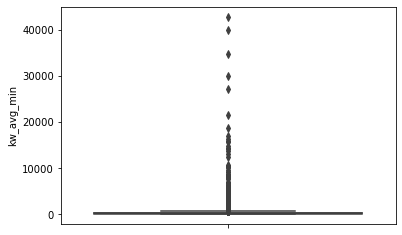

kw_min_max


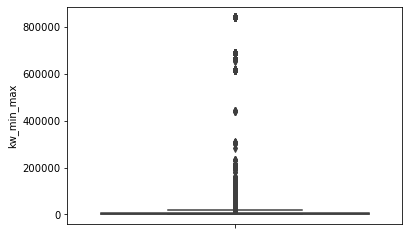

kw_max_max


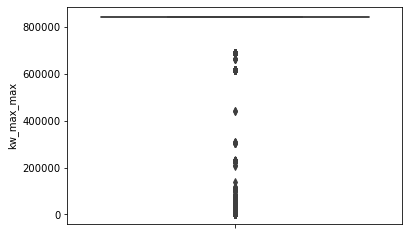

kw_avg_max


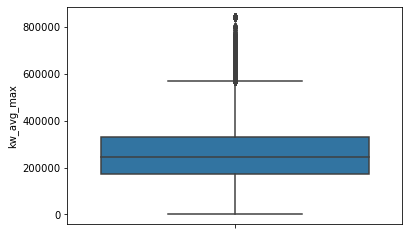

kw_min_avg


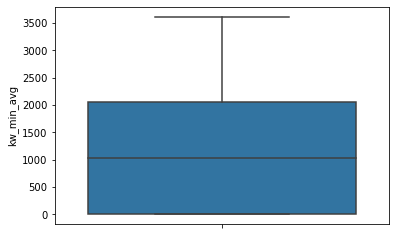

kw_max_avg


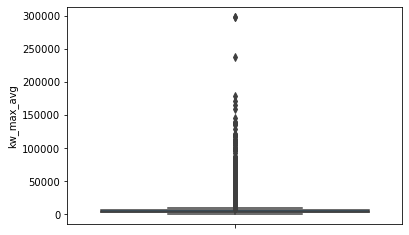

kw_avg_avg


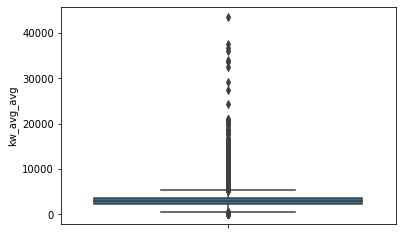

self_reference_min_shares


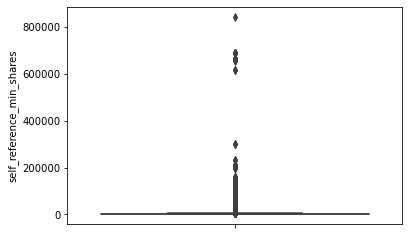

self_reference_max_shares


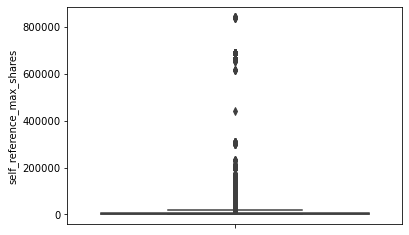

self_reference_avg_sharess


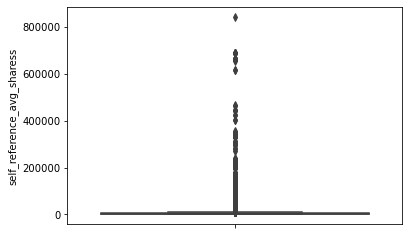

LDA_00


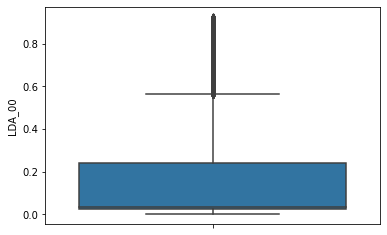

LDA_01


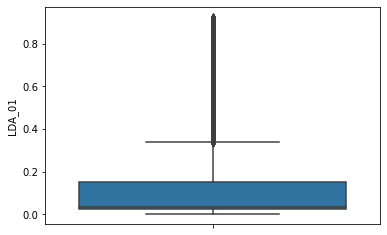

LDA_02


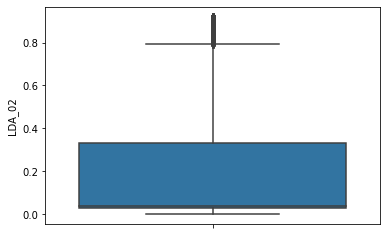

LDA_03


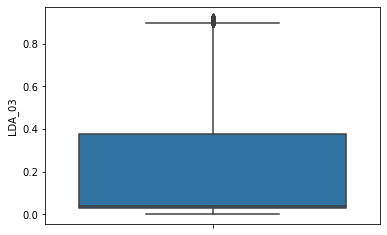

LDA_04


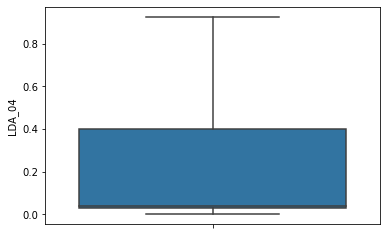

global_subjectivity


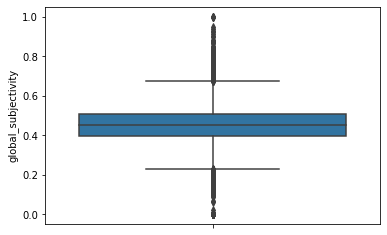

global_sentiment_polarity


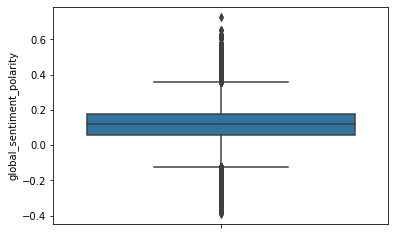

global_rate_positive_words


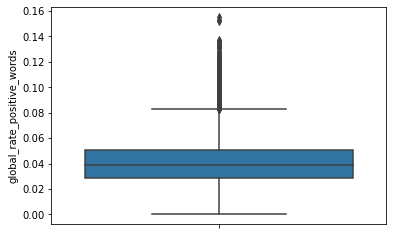

global_rate_negative_words


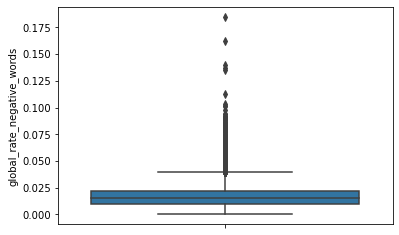

rate_positive_words


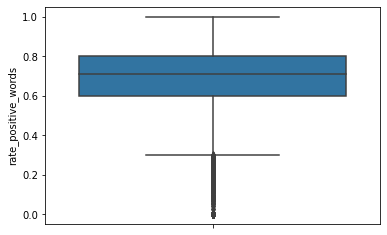

rate_negative_words


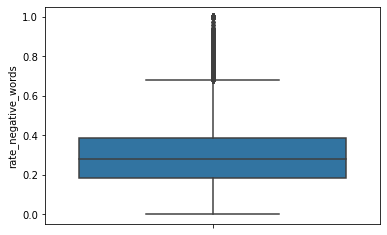

avg_positive_polarity


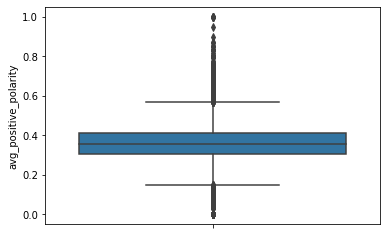

min_positive_polarity


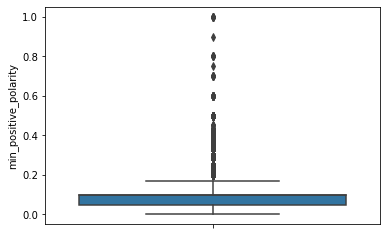

max_positive_polarity


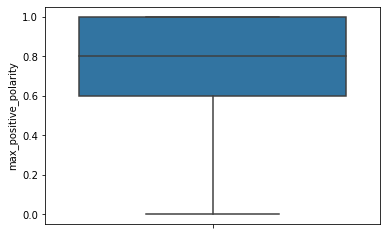

avg_negative_polarity


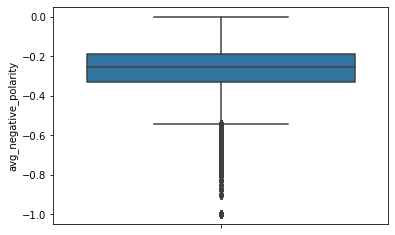

min_negative_polarity


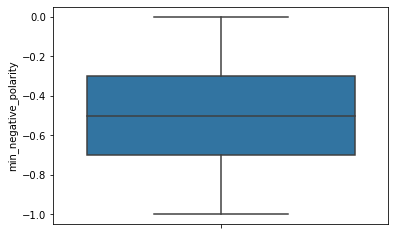

max_negative_polarity


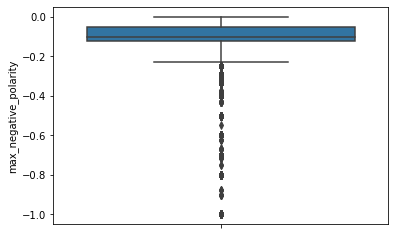

title_subjectivity


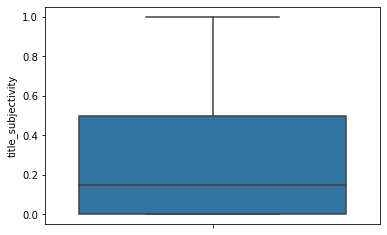

title_sentiment_polarity


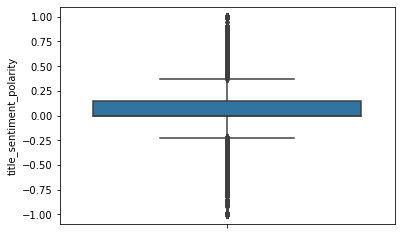

abs_title_subjectivity


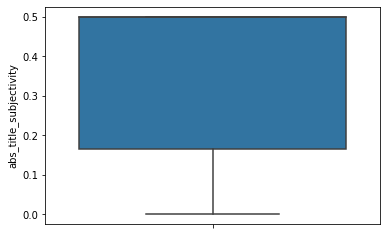

abs_title_sentiment_polarity


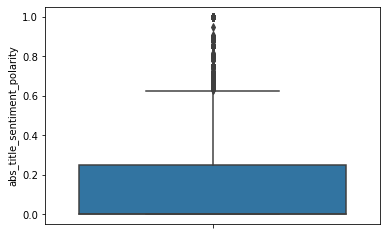

In [19]:
for col in num:
    print(col)
    sns.boxplot(y=df[col])
    plt.show()

### Treating Outliers 

1. The maximum value in every different attribute corresponds to different instance. Thus, deleting these many observations is not a wise option
2. Also Z score values lead to deleing of 40% of data which is again not a good approach
3. Thus, we go ahead and cap the values at 1st and 99th percentile and thus treating the outliers

In [20]:
for col in num:
    percentiles=df[col].quantile([0.01,0.99]).values
    df.loc[df[col]<=percentiles[0],col]=percentiles[0]
    df.loc[df[col]>=percentiles[1],col]=percentiles[1]

In [21]:
df[num].skew()

n_tokens_title                  0.098318
n_tokens_content                1.663434
n_unique_tokens                -1.528958
n_non_stop_words               -5.531834
n_non_stop_unique_tokens       -2.436101
num_hrefs                       2.119621
num_self_hrefs                  2.519975
num_imgs                        2.474144
num_videos                      4.532052
average_token_length           -4.639645
num_keywords                   -0.113162
kw_min_min                      2.373334
kw_max_min                      4.705625
kw_avg_min                      2.909615
kw_min_max                      4.952581
kw_max_max                     -2.641479
kw_avg_max                      0.473937
kw_min_avg                      0.464632
kw_max_avg                      3.277704
kw_avg_avg                      1.195012
self_reference_min_shares       4.899794
self_reference_max_shares       3.818907
self_reference_avg_sharess      4.149795
LDA_00                          1.564027
LDA_01          

In [22]:
lst1=[] 
for col in num: 
    if((df[col].skew()<0.1) or (df[col].skew()>0.2)): 
        lst1.append(col)

In [23]:
len(lst1)

42

In [24]:
for col in num:
    if col in lst1: 
        df[col]=list(st.yeojohnson(df[col])[0]) 
df[num].skew()

n_tokens_title                 -0.019950
n_tokens_content                0.082758
n_unique_tokens                 0.104096
n_non_stop_words               -5.531834
n_non_stop_unique_tokens        0.055740
num_hrefs                       0.006309
num_self_hrefs                 -0.000657
num_imgs                        0.178428
num_videos                      0.668557
average_token_length           -0.441360
num_keywords                   -0.081615
kw_min_min                      0.574920
kw_max_min                      0.328776
kw_avg_min                      0.220652
kw_min_max                     -0.073430
kw_max_max                     -1.694819
kw_avg_max                     -0.044422
kw_min_avg                     -0.231165
kw_max_avg                      0.145608
kw_avg_avg                      0.000185
self_reference_min_shares      -0.110639
self_reference_max_shares      -0.200148
self_reference_avg_sharess     -0.194870
LDA_00                          0.800869
LDA_01          

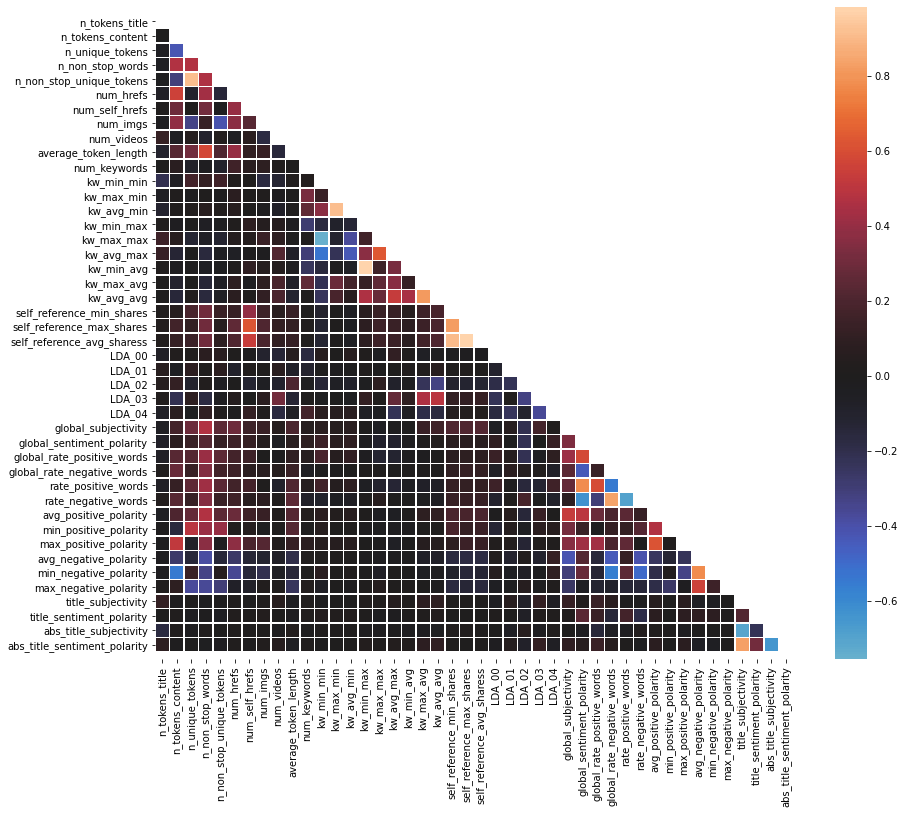

In [25]:
corr=df[num].corr()
plt.figure(figsize=[15,12])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax=sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [26]:
X=df.drop('shares',axis=1)
y=df['shares']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
st.ttest_ind(X_train,X)[1]

array([0.80579412, 0.31463061, 0.57102187, 0.88550762, 0.917384  ,
       0.92190585, 0.8184661 , 0.92054104, 0.87968754, 0.86460514,
       0.4946654 , 0.89754205, 0.76145636, 0.95494243, 0.54556048,
       0.91557957, 0.88133045, 0.72704259, 0.44279121, 0.68794585,
       0.87013973, 0.42262955, 0.82141298, 0.80457873, 0.97923416,
       0.83854597, 0.64522766, 0.85794161, 0.79101386, 0.49568424,
       0.94484379, 0.81019798, 0.52171128, 0.75890455, 0.81961236,
       0.84370411, 0.98796988, 0.84858119, 0.68145889, 0.91122011,
       0.83802513, 0.85715679, 0.9079267 , 0.96372983, 0.96225705,
       0.81249778, 0.98588513, 0.90388215, 0.62288734, 0.43120695,
       0.78071199, 0.84576697, 0.87494767, 0.92062683, 0.97140703,
       0.74646204, 0.83381109, 0.97053793])

In [29]:
st.ttest_ind(X_test,X)[1]

array([0.66635101, 0.07793242, 0.32224764, 0.8008458 , 0.85607174,
       0.86426814, 0.6881114 , 0.86173418, 0.79152393, 0.76678779,
       0.23292891, 0.82238008, 0.59524806, 0.92141575, 0.28699298,
       0.85301576, 0.79412942, 0.54281035, 0.18067533, 0.48344158,
       0.77538359, 0.16306143, 0.69486966, 0.66567446, 0.96377611,
       0.72264113, 0.42398738, 0.75514791, 0.64462109, 0.23193468,
       0.90385699, 0.67528827, 0.26494854, 0.59103651, 0.6894875 ,
       0.73121151, 0.97898635, 0.73865239, 0.47225021, 0.84551404,
       0.72139025, 0.75314004, 0.83995074, 0.9367592 , 0.9342419 ,
       0.67916839, 0.97536922, 0.83315053, 0.39100905, 0.17060567,
       0.62666373, 0.73388473, 0.78362126, 0.86145808, 0.95006864,
       0.57013725, 0.71440585, 0.9485001 ])

In [30]:
st.ttest_ind(y_train,y)[1]

0.6871945618438352

In [31]:
st.ttest_ind(y_test,y)[1]

0.481940663411366

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,precision_recall_curve
import warnings
warnings.filterwarnings(action='ignore')

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [34]:
lr=LogisticRegression(random_state=42)
lr.fit(X_trains,y_train)

y_train_pred=lr.predict(X_trains)
y_train_prob=lr.predict_proba(X_trains)[:,1]

y_test_pred=lr.predict(X_tests)
y_test_prob=lr.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ','\n', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ','\n', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[ 7772  5127]
 [ 4213 10638]]
Accuracy Score - Train:  0.6634234234234234
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.65      0.60      0.62     12899
           1       0.67      0.72      0.69     14851

    accuracy                           0.66     27750
   macro avg       0.66      0.66      0.66     27750
weighted avg       0.66      0.66      0.66     27750

AUC Score - Train:  0.7183500665621583



Confusion Matrix - Test:  
 [[3340 2251]
 [1843 4460]]
Accuracy Score - Test:  0.6557928367243988
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      5591
           1       0.66      0.71      0.69      6303

    accuracy                           0.66     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.66      0.66      0.65     11894

AUC Score - Test:  0.70862929256701

In [35]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_test_prob)

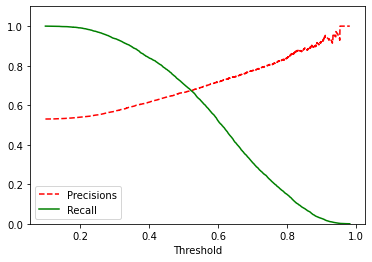

In [36]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"r--",label="Precisions")
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center top")
    plt.ylim([0, 1.1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

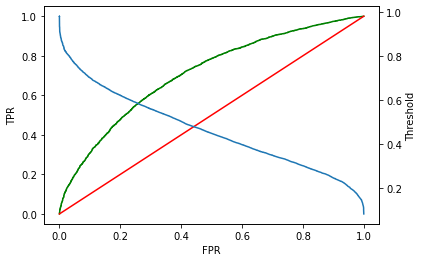

In [37]:
fpr,tpr,threshold=roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,axis1=plt.subplots()
axis1.plot(fpr,tpr,'g')
axis1.plot(fpr,fpr,'r-')
axis1.set_ylabel('TPR')
axis2=axis1.twinx()
axis2.plot(fpr,threshold)
axis2.set_ylabel('Threshold')
axis1.set_xlabel('FPR')
plt.show()

### SMOTE

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27750, 58)
(11894, 58)
(27750,)
(11894,)


In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 14851
Before OverSampling, counts of label '0': 12899 



In [40]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_train_res, y_train_res = smt.fit_sample(X_train, y_train.ravel()) 

In [41]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (29702, 58)
After OverSampling, the shape of train_y: (29702,) 

After OverSampling, counts of label '1': 14851
After OverSampling, counts of label '0': 14851


In [42]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_res,y_train_res)

y_test_pred=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ','\n', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Test:  
 [[5591    0]
 [6303    0]]
Accuracy Score - Test:  0.47006894232386076
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.47      1.00      0.64      5591
           1       0.00      0.00      0.00      6303

    accuracy                           0.47     11894
   macro avg       0.24      0.50      0.32     11894
weighted avg       0.22      0.47      0.30     11894

AUC Score - Test:  0.5178052128325613


### Feature Importance

In [43]:
X.shape

(39644, 58)

In [44]:
from sklearn.feature_selection import chi2,SelectKBest

In [45]:
from sklearn.preprocessing import minmax_scale
Xminmax=minmax_scale(X)
bestfeatures=SelectKBest(score_func=chi2,k=15)
fit=bestfeatures.fit(Xminmax,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featscore=pd.concat([dfcolumns,dfscores],axis=1)
featscore.columns=['Specs','Score']
top30=featscore.nlargest(30,'Score')
top30

,Specs,Score
16,data_channel_is_world,742.216218
36,is_weekend,683.539506
14,data_channel_is_socmed,468.525704
34,weekday_is_saturday,441.366335
12,data_channel_is_entertainment,424.657781
15,data_channel_is_tech,341.529586
39,LDA_02,326.537436
35,weekday_is_sunday,259.635584
41,LDA_04,119.516101
25,kw_avg_avg,109.032207


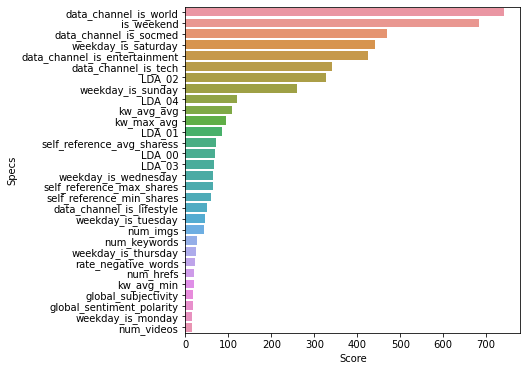

In [46]:
plt.figure(figsize=(6,6))
sns.barplot(y=top30['Specs'],x=top30['Score'])
plt.show()

In [47]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

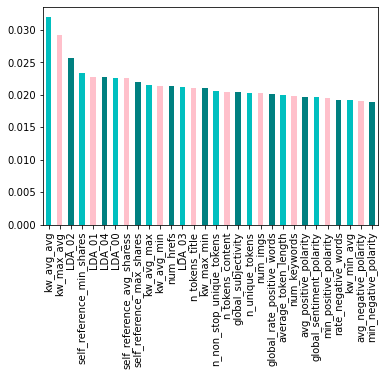

In [48]:
model=ExtraTreesClassifier()
model.fit(Xminmax,y)
feature_imp=pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(30).sort_values(ascending=False).plot(kind='bar',color=['c','pink','teal'])
plt.show()

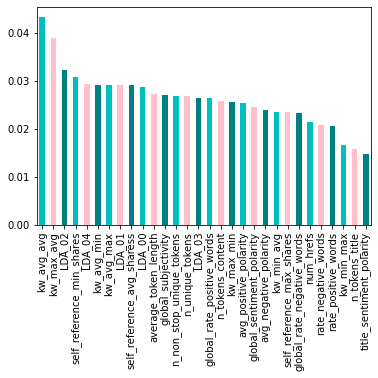

In [49]:
model1=RandomForestClassifier()
model1.fit(Xminmax,y)
feature_imp1=pd.Series(model1.feature_importances_, index=X.columns)
feature_imp1.nlargest(30).sort_values(ascending=False).plot(kind='bar',color=['c','pink','teal'])
plt.show()

In [50]:
rf_impcol=set(feature_imp1.nlargest(30).sort_values(ascending=False).index)
rf_impcol

{'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'average_token_length',
 'avg_negative_polarity',
 'avg_positive_polarity',
 'global_rate_negative_words',
 'global_rate_positive_words',
 'global_sentiment_polarity',
 'global_subjectivity',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_avg_min',
 'kw_max_avg',
 'kw_max_min',
 'kw_min_avg',
 'kw_min_max',
 'n_non_stop_unique_tokens',
 'n_tokens_content',
 'n_tokens_title',
 'n_unique_tokens',
 'num_hrefs',
 'rate_negative_words',
 'rate_positive_words',
 'self_reference_avg_sharess',
 'self_reference_max_shares',
 'self_reference_min_shares',
 'title_sentiment_polarity'}

In [51]:
et_impcol=set(feature_imp.nlargest(30).sort_values(ascending=False).index)
et_impcol

{'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'average_token_length',
 'avg_negative_polarity',
 'avg_positive_polarity',
 'global_rate_positive_words',
 'global_sentiment_polarity',
 'global_subjectivity',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_avg_min',
 'kw_max_avg',
 'kw_max_min',
 'kw_min_avg',
 'min_negative_polarity',
 'min_positive_polarity',
 'n_non_stop_unique_tokens',
 'n_tokens_content',
 'n_tokens_title',
 'n_unique_tokens',
 'num_hrefs',
 'num_imgs',
 'num_keywords',
 'rate_negative_words',
 'self_reference_avg_sharess',
 'self_reference_max_shares',
 'self_reference_min_shares'}

In [52]:
chi_impcol=set(top30['Specs'].values)
chi_impcol

{'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'data_channel_is_entertainment',
 'data_channel_is_lifestyle',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'global_sentiment_polarity',
 'global_subjectivity',
 'is_weekend',
 'kw_avg_avg',
 'kw_avg_min',
 'kw_max_avg',
 'num_hrefs',
 'num_imgs',
 'num_keywords',
 'num_videos',
 'rate_negative_words',
 'self_reference_avg_sharess',
 'self_reference_max_shares',
 'self_reference_min_shares',
 'weekday_is_monday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'weekday_is_thursday',
 'weekday_is_tuesday',
 'weekday_is_wednesday'}

In [53]:
Xc=sm.add_constant(X)

In [54]:
model=sm.Logit(y,Xc).fit()
model.summary()

         Current function value: 0.617366
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 shares   No. Observations:                39644
Model:                          Logit   Df Residuals:                    39642
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1064
Time:                        10:06:58   Log-Likelihood:                -24475.
converged:                      False   LL-Null:                       -27390.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -5375.9546        nan        nan        nan         nan         nan
n_tokens_title                   -0.0019      0.011     -0.176      0.860      -0.023       0.019
n_tokens_content                  0.0067      0.003      2.220      0.026       0.001       0.013
n_unique_tokens                   0.0448      0.097      0.464      0.642      -0.144       0.234
n_non_stop_words               1.762e-13   7.84e-14      2.248      0.025    2.25e-14     3.3e-13
n_non_stop_unique_tokens         -0.0411      0.029     -1.424      0.155      -0.098       0.015
num_hrefs                         0.1346      0.017      8.113      0.000       0.102       0.167
num_self_hrefs                   -0.1551      0.025     -6.085      0.000      -0.205      -0.105
num_imgs                          0.1805      0.030      5.952      0.000       0.121       0.240
num_videos                        0.4330      0.055      7.916      0.000       0.326       0.540
average_token_length          -9.677e-05   4.93e-05     -1.963      0.050      -0.000    -1.6e-07
num_keywords                      0.0091      0.007      1.377      0.169      -0.004       0.022
data_channel_is_lifestyle        -0.1093      0.070     -1.556      0.120      -0.247       0.028
data_channel_is_entertainment    -0.3773      0.046     -8.160      0.000      -0.468      -0.287
data_channel_is_bus               0.0258      0.065      0.400      0.689      -0.101       0.152
data_channel_is_socmed            0.8402      0.071     11.786      0.000       0.700       0.980
data_channel_is_tech              0.5918      0.063      9.379      0.000       0.468       0.715
data_channel_is_world            -0.1085      0.064     -1.700      0.089      -0.234       0.017
kw_min_min                       -0.0675      0.010     -6.666      0.000      -0.087      -0.048
kw_max_min                       -0.0200      0.007     -2.962      0.003      -0.033      -0.007
kw_avg_min                        0.0170      0.006      3.076      0.002       0.006       0.028
kw_min_max                       -0.0128      0.014     -0.908      0.364      -0.040       0.015
kw_max_max                    -4.397e-19   3.26e-20    -13.502      0.000   -5.04e-19   -3.76e-19
kw_avg_max                    -1.696e-05   5.79e-06     -2.929      0.003   -2.83e-05   -5.61e-06
kw_min_avg                       -0.0083      0.013     -0.646      0.518      -0.034       0.017
kw_max_avg                     7642.1804   2042.229      3.742      0.000    3639.486    1.16e+04
kw_avg_avg                        9.8236      0.675     14.562      0.000       8.501      11.146
self_reference_min_shares        -0.0059      0.005     -1.294      0.196      -0.015       0.003
self_reference_max_shares        -0.0452      0.008     -5.336      0.000      -0.062      -0.029
self_reference_avg_sharess        0.0679      0.010      6.469      0.000       0.047       0.088
weekday

In [55]:
#Removing insignificant features(x p-values>0.05)
cols=list(Xc.columns)
while(len(cols)>0):
    x_1=Xc[cols]
    model=sm.Logit(y,x_1).fit()
    p=model.pvalues
    feature_maxp=p.idxmax()
    pmax=max(p)
    if(pmax>0.05):
        cols.remove(feature_maxp)
    else:
        break
bi_cols=set(cols)
bi_cols

         Current function value: 0.617366
         Iterations: 35


{'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'abs_title_sentiment_polarity',
 'abs_title_subjectivity',
 'average_token_length',
 'avg_negative_polarity',
 'avg_positive_polarity',
 'const',
 'data_channel_is_bus',
 'data_channel_is_entertainment',
 'data_channel_is_lifestyle',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'global_rate_negative_words',
 'global_rate_positive_words',
 'global_sentiment_polarity',
 'global_subjectivity',
 'is_weekend',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_avg_min',
 'kw_max_avg',
 'kw_max_max',
 'kw_max_min',
 'kw_min_avg',
 'kw_min_max',
 'kw_min_min',
 'max_negative_polarity',
 'max_positive_polarity',
 'min_negative_polarity',
 'min_positive_polarity',
 'n_non_stop_unique_tokens',
 'n_non_stop_words',
 'n_tokens_content',
 'n_tokens_title',
 'n_unique_tokens',
 'num_hrefs',
 'num_imgs',
 'num_keywords',
 'num_self_hrefs',
 'num_videos',
 'rate_negative_words',
 'rate_positive_words',
 'self_reference_avg_share

In [56]:
final_imp_cols=list(bi_cols.intersection(chi_impcol,et_impcol,rf_impcol))

In [57]:
Xi=X[final_imp_cols]
yi=y

In [58]:
Xi.shape,yi.shape

((39644, 15), (39644,))

In [59]:
Xi_train, Xi_test , yi_train, yi_test = train_test_split(Xi,yi, test_size = 0.30, random_state = 42)
print(Xi_train.shape)
print(Xi_test.shape)
print(yi_train.shape)
print(yi_test.shape)

(27750, 15)
(11894, 15)
(27750,)
(11894,)


In [60]:
lri=LogisticRegression(random_state=42)
lri.fit(Xi_train,yi_train)

y_test_pred=lri.predict(Xi_test)
y_test_prob=lri.predict_proba(Xi_test)[:,1]

print('Confusion Matrix - Test: ', '\n',confusion_matrix(yi_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(yi_test,y_test_pred))
print('Classification Report - Test: ','\n', classification_report(yi_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(yi_test,y_test_prob))

Confusion Matrix - Test:  
 [[2693 2898]
 [1779 4524]]
Accuracy Score - Test:  0.6067765259794855
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.60      0.48      0.54      5591
           1       0.61      0.72      0.66      6303

    accuracy                           0.61     11894
   macro avg       0.61      0.60      0.60     11894
weighted avg       0.61      0.61      0.60     11894

AUC Score - Test:  0.6359675531886668


In [61]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
ada=AdaBoostClassifier()
bg=BaggingClassifier()
gb=GradientBoostingClassifier()
gnb=GaussianNB()
bnb=BernoulliNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [63]:
models=[]
models.append(('KNeighbors Classifier',knn))
models.append(('AdaBoost Classifier',ada))
models.append(('DecisionTree Classifier',dt))
models.append(('Bernoulli NB',bnb))
models.append(('Gaussian NB',gnb))
models.append(('Bagging Classifier',bg))
models.append(('GradientBoosting Classifier',gb))
models.append(('RandomForest Classifier',rfc))

In [64]:
names=[]
for name,model in models:
    model.fit(X_trains,y_train)
    y_train_pred=model.predict(X_trains)
    y_train_prob=model.predict_proba(X_trains)[:,1]
    y_test_pred=model.predict(X_tests)
    y_test_prob=model.predict_proba(X_tests)[:,1]
    print(name)
    print('Performance Metrics for Train Set')
    print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_train_pred))
    print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
    print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))
    print('Performance Metrics for Test Set')
    print('Confusion Matrix - Test:', '\n',confusion_matrix(y_test,y_test_pred))
    print('Accuracy Score - Test: ',accuracy_score(y_test,y_test_pred))
    print('AUC Score - Test: ',roc_auc_score(y_test,y_test_prob))
    print('\n')

KNeighbors Classifier
Performance Metrics for Train Set
Confusion Matrix - Train: 
 [[ 9517  3382]
 [ 3653 11198]]
Accuracy Score - Train:  0.7464864864864865
AUC Score - Train:  0.8254897477644553
Performance Metrics for Test Set
Confusion Matrix - Test: 
 [[3378 2213]
 [2364 3939]]
Accuracy Score - Test:  0.6151841264503111
AUC Score - Test:  0.6506471765821824


AdaBoost Classifier
Performance Metrics for Train Set
Confusion Matrix - Train: 
 [[ 7955  4944]
 [ 4191 10660]]
Accuracy Score - Train:  0.6708108108108108
AUC Score - Train:  0.7312360772666548
Performance Metrics for Test Set
Confusion Matrix - Test: 
 [[3402 2189]
 [1849 4454]]
Accuracy Score - Test:  0.6605010929880613
AUC Score - Test:  0.7192725877724486


DecisionTree Classifier
Performance Metrics for Train Set
Confusion Matrix - Train: 
 [[12899     0]
 [    0 14851]]
Accuracy Score - Train:  1.0
AUC Score - Train:  1.0
Performance Metrics for Test Set
Confusion Matrix - Test: 
 [[3139 2452]
 [2494 3809]]
Accuracy 

In [65]:
names=[]
for name,model in models:
    model.fit(X_trains,y_train)
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X_trains,y_train,cv=kfold,scoring='f1_weighted')
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100
                         ,np.var(cv_results,ddof=1)))

KNeighbors Classifier: 61.597647 (0.000050)
AdaBoost Classifier: 66.329658 (0.000090)
DecisionTree Classifier: 58.264105 (0.000030)
Bernoulli NB: 64.002215 (0.000104)
Gaussian NB: 62.591646 (0.000174)
Bagging Classifier: 62.780137 (0.000079)
GradientBoosting Classifier: 66.823096 (0.000082)
RandomForest Classifier: 66.456887 (0.000070)


In [66]:
results=[]
names=[]
for name,model in models:
    model.fit(X_trains,y_train)
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X_trains,y_train,cv=kfold,scoring='roc_auc')
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100
                         ,np.var(cv_results,ddof=1)))
    results.append((cv_results)*100)

KNeighbors Classifier: 65.358979 (0.000069)
AdaBoost Classifier: 72.033383 (0.000132)
DecisionTree Classifier: 58.018842 (0.000047)
Bernoulli NB: 68.883624 (0.000085)
Gaussian NB: 68.839448 (0.000178)
Bagging Classifier: 67.599793 (0.000083)
GradientBoosting Classifier: 73.044750 (0.000097)
RandomForest Classifier: 72.405569 (0.000085)


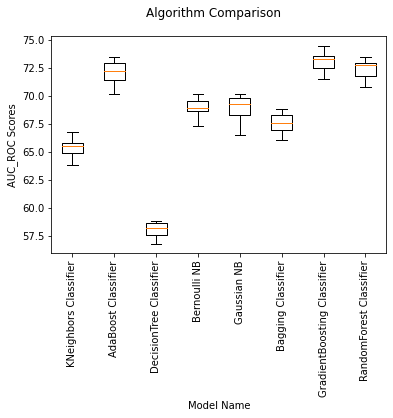

In [67]:
fig = plt.figure(figsize=(6,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.ylabel('AUC_ROC Scores')
plt.xlabel('Model Name')
plt.show()

In [68]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_trains,y_train)

y_train_pred=gb.predict(X_trains)
y_train_prob=gb.predict_proba(X_trains)[:,1]

y_test_pred=gb.predict(X_tests)
y_test_prob=gb.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ','\n', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ','\n', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

Confusion Matrix - Train:  
 [[ 8095  4804]
 [ 3784 11067]]
Accuracy Score - Train:  0.6905225225225226
Classification Report - Train:  
               precision    recall  f1-score   support

           0       0.68      0.63      0.65     12899
           1       0.70      0.75      0.72     14851

    accuracy                           0.69     27750
   macro avg       0.69      0.69      0.69     27750
weighted avg       0.69      0.69      0.69     27750

AUC Score - Train:  0.7565705142853516



Confusion Matrix - Test:  
 [[3349 2242]
 [1716 4587]]
Accuracy Score - Test:  0.6672271733647217
Classification Report - Test:  
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      5591
           1       0.67      0.73      0.70      6303

    accuracy                           0.67     11894
   macro avg       0.67      0.66      0.66     11894
weighted avg       0.67      0.67      0.67     11894

AUC Score - Test:  0.73133355881527

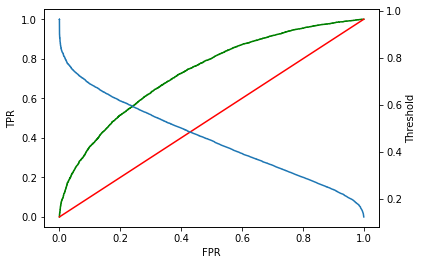

In [69]:
fpr,tpr,threshold=roc_curve(y_test,y_test_prob)
threshold[0]=threshold[0]-1
fig,axis1=plt.subplots()
axis1.plot(fpr,tpr,'g')
axis1.plot(fpr,fpr,'r-')
axis1.set_ylabel('TPR')
axis2=axis1.twinx()
axis2.plot(fpr,threshold)
axis2.set_ylabel('Threshold')
axis1.set_xlabel('FPR')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
gb=GradientBoostingClassifier(random_state=3)
params={
    'n_estimators':sp_randint(50,100),
    'max_depth':sp_randint(2,10),
    'min_samples_leaf':sp_randint(1,50),
    'min_samples_split':sp_randint(2,50),
    'max_features':sp_randint(2,15),
    'criterion':['friedman_mse', 'mse', 'mae']
}
rsearch=RandomizedSearchCV(gb,param_distributions=params,cv=3,n_iter=10,scoring='roc_auc'
                           ,n_jobs=-1,random_state=3)
rsearch.fit(X,y)

In [ ]:
rsearch.best_params_

In [ ]:
gb=GradientBoostingClassifier(**rsearch.best_params_,random_state=3)
gb.fit(X_train,y_train)

y_train_pred=gb.predict(X_train) #It will give 01 instead of probability using by default cutoff 0.5
y_train_prob=gb.predict_proba(X_train)[:,1]

y_test_pred=gb.predict(X_test)
y_test_prob=gb.predict_proba(X_test)[:,1]

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=5, min_samples_leaf=5)
giniDecisionTree.fit(Xminmax, y)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [ ]:
features = X.columns
dot_data = export_graphviz(giniDecisionTree, out_file=None, feature_names=features,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())